# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [68]:
# Importing the file porter_data_1.csv
df =pd.read_csv('G:\\ML UPGRAD\\Linear Regression ORDER DELIVERY TIME PREDICTION\\Delivery_Starter\\porter_data_1.csv')

In [69]:
# check the data in dataframe
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [70]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [71]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [73]:
# Convert categorical features to category type
df['market_id'] = df['market_id'].astype('category')
df['store_primary_category'] = df['store_primary_category'].astype('category') 
df['order_protocol'] = df['order_protocol'].astype('int64').astype('category')


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### The info from the dataset shows total range index value equals to NON NULL COUNTs for all the columns. i.e no null is present in the current dataframe

In [75]:
# lets prove it, out should be zero for all columns
df.isnull().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
dtype: int64

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [76]:
# Calculate time taken in minutes
df['time_taken']=(df['actual_delivery_time']-df['created_at']).dt.total_seconds()/60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [77]:
# Extract the hour and day of week from the 'created_at' timestamp
df['order_hour']=df['created_at'].dt.hour
df['dayofweek']=df['created_at'].dt.dayofweek 
# Create a categorical feature 'isWeekend'
df['dayofweek'].unique()


array([4, 1, 0, 3, 6, 5, 2])

In [78]:
# Here 0 means MONDAY and 6 Means SUNDAY
map_weekend = {0:0,1:0,2:0,3:0,4:0,5:1,6:1}
# sat or 5, sunday or 6 means weekend so represent by 1 else 0
df['isWeekend']=df['dayofweek'].map(map_weekend)
df['isWeekend']=df['isWeekend'].astype('category')
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0              1            4      3441                   4             557   
1              2            1      1900                   1            1400   
2              3            4      4771                   3             820   
3              1            1      1525                   1            1525   
4              1            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  order_hour  dayofweek  \
0                      21.0     34.44        47.0          22          4   
1                       2.0     27.60        44.0          21          1   
2                      18.0     11.56        55.0           0          0   
3                       8.0     31.80        59.0           3          3   
4                       7.0      8.20        46.0           2          1   

  isWeekend  
0         0  
1         0  
2         0  
3         0  
4         0

In [79]:
# Drop unnecessary columns
# 'created_at' and 'actual_delivery_time' are now used to create 'time_taken' and other useful columns
df.drop(['created_at','actual_delivery_time'],inplace=True,axis=1)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  category
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  float64 
 9   total_busy_dashers        175777 non-null  float64 
 10  total_outstanding_orders  175777 non-null  float64 
 11  distance                  175777 non-null  float64 
 12  time_taken                175777 non-null  float64 
 13  order_hour                175

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [82]:
# Define target variable (y) and features (X)
target = 'time_taken' 
features = [col for col in df.columns if col != target]
X = df[features] 
y = df[target]

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [83]:
# Split data into training and testing sets
# use 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
df_train=pd.concat([X_train, y_train], axis=1)

In [85]:
df_test=pd.concat([X_test, y_test], axis=1)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [86]:
# Define numerical and categorical columns for easy EDA and data manipulation
# let check the existing columns in the dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 102712 to 121958
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 140621 non-null  category
 1   store_primary_category    140621 non-null  category
 2   order_protocol            140621 non-null  category
 3   total_items               140621 non-null  int64   
 4   subtotal                  140621 non-null  int64   
 5   num_distinct_items        140621 non-null  int64   
 6   min_item_price            140621 non-null  int64   
 7   max_item_price            140621 non-null  int64   
 8   total_onshift_dashers     140621 non-null  float64 
 9   total_busy_dashers        140621 non-null  float64 
 10  total_outstanding_orders  140621 non-null  float64 
 11  distance                  140621 non-null  float64 
 12  order_hour                140621 non-null  int32   
 13  dayofweek                 140

In [87]:
# Will separate the categorical vs numericals based on dtype

numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist() 
categorical_cols = X_train.select_dtypes(include='category').columns.tolist()

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

In [92]:
# Plot distributions for all numerical columns
i=1
row=3
col=4
plt.figure(figsize=(25,20))
for cols in numerical_cols:
    plt.subplot(3,4,i)
    i=i+1
    sns.histplot(X_train[cols],bins=100, kde=True,color='green')
    sns.set_style("darkgrid")
    sns.set_theme()
    plt.xlabel(cols)
    plt.plot()
    



##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [93]:
# Distribution of categorical columns

i=1
row=4
col=1
plt.figure(figsize=(25,20))
for cols in categorical_cols:
    plt.subplot(row,col,i)
    i=i+1
    sns.countplot(data=X_train,x=cols,palette='Set2')
    sns.set_style("darkgrid")
    sns.set_theme()
    plt.xticks(rotation=45, ha='right') 
    plt.xlabel(cols)
    plt.plot()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

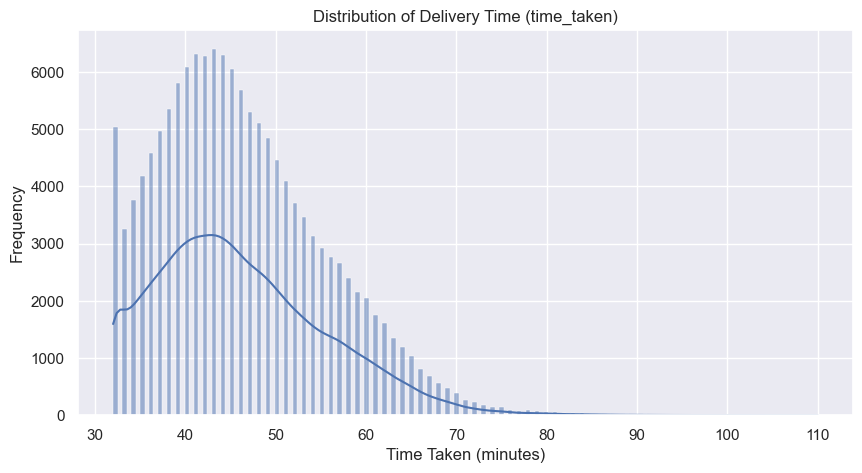

In [94]:
# Distribution of time_taken
plt.figure(figsize=(10,5))
sns.histplot(y_train, kde=True)
plt.title('Distribution of Delivery Time (time_taken)')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
sns.set_style("darkgrid")
sns.set_theme()



In [95]:
y_train.describe()

count    140621.000000
mean         46.198071
std           9.320360
min          32.000000
25%          39.000000
50%          45.000000
75%          52.000000
max         110.000000
Name: time_taken, dtype: float64

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

In [96]:
important_numerical_features = ['distance', 'total_items', 'subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders']

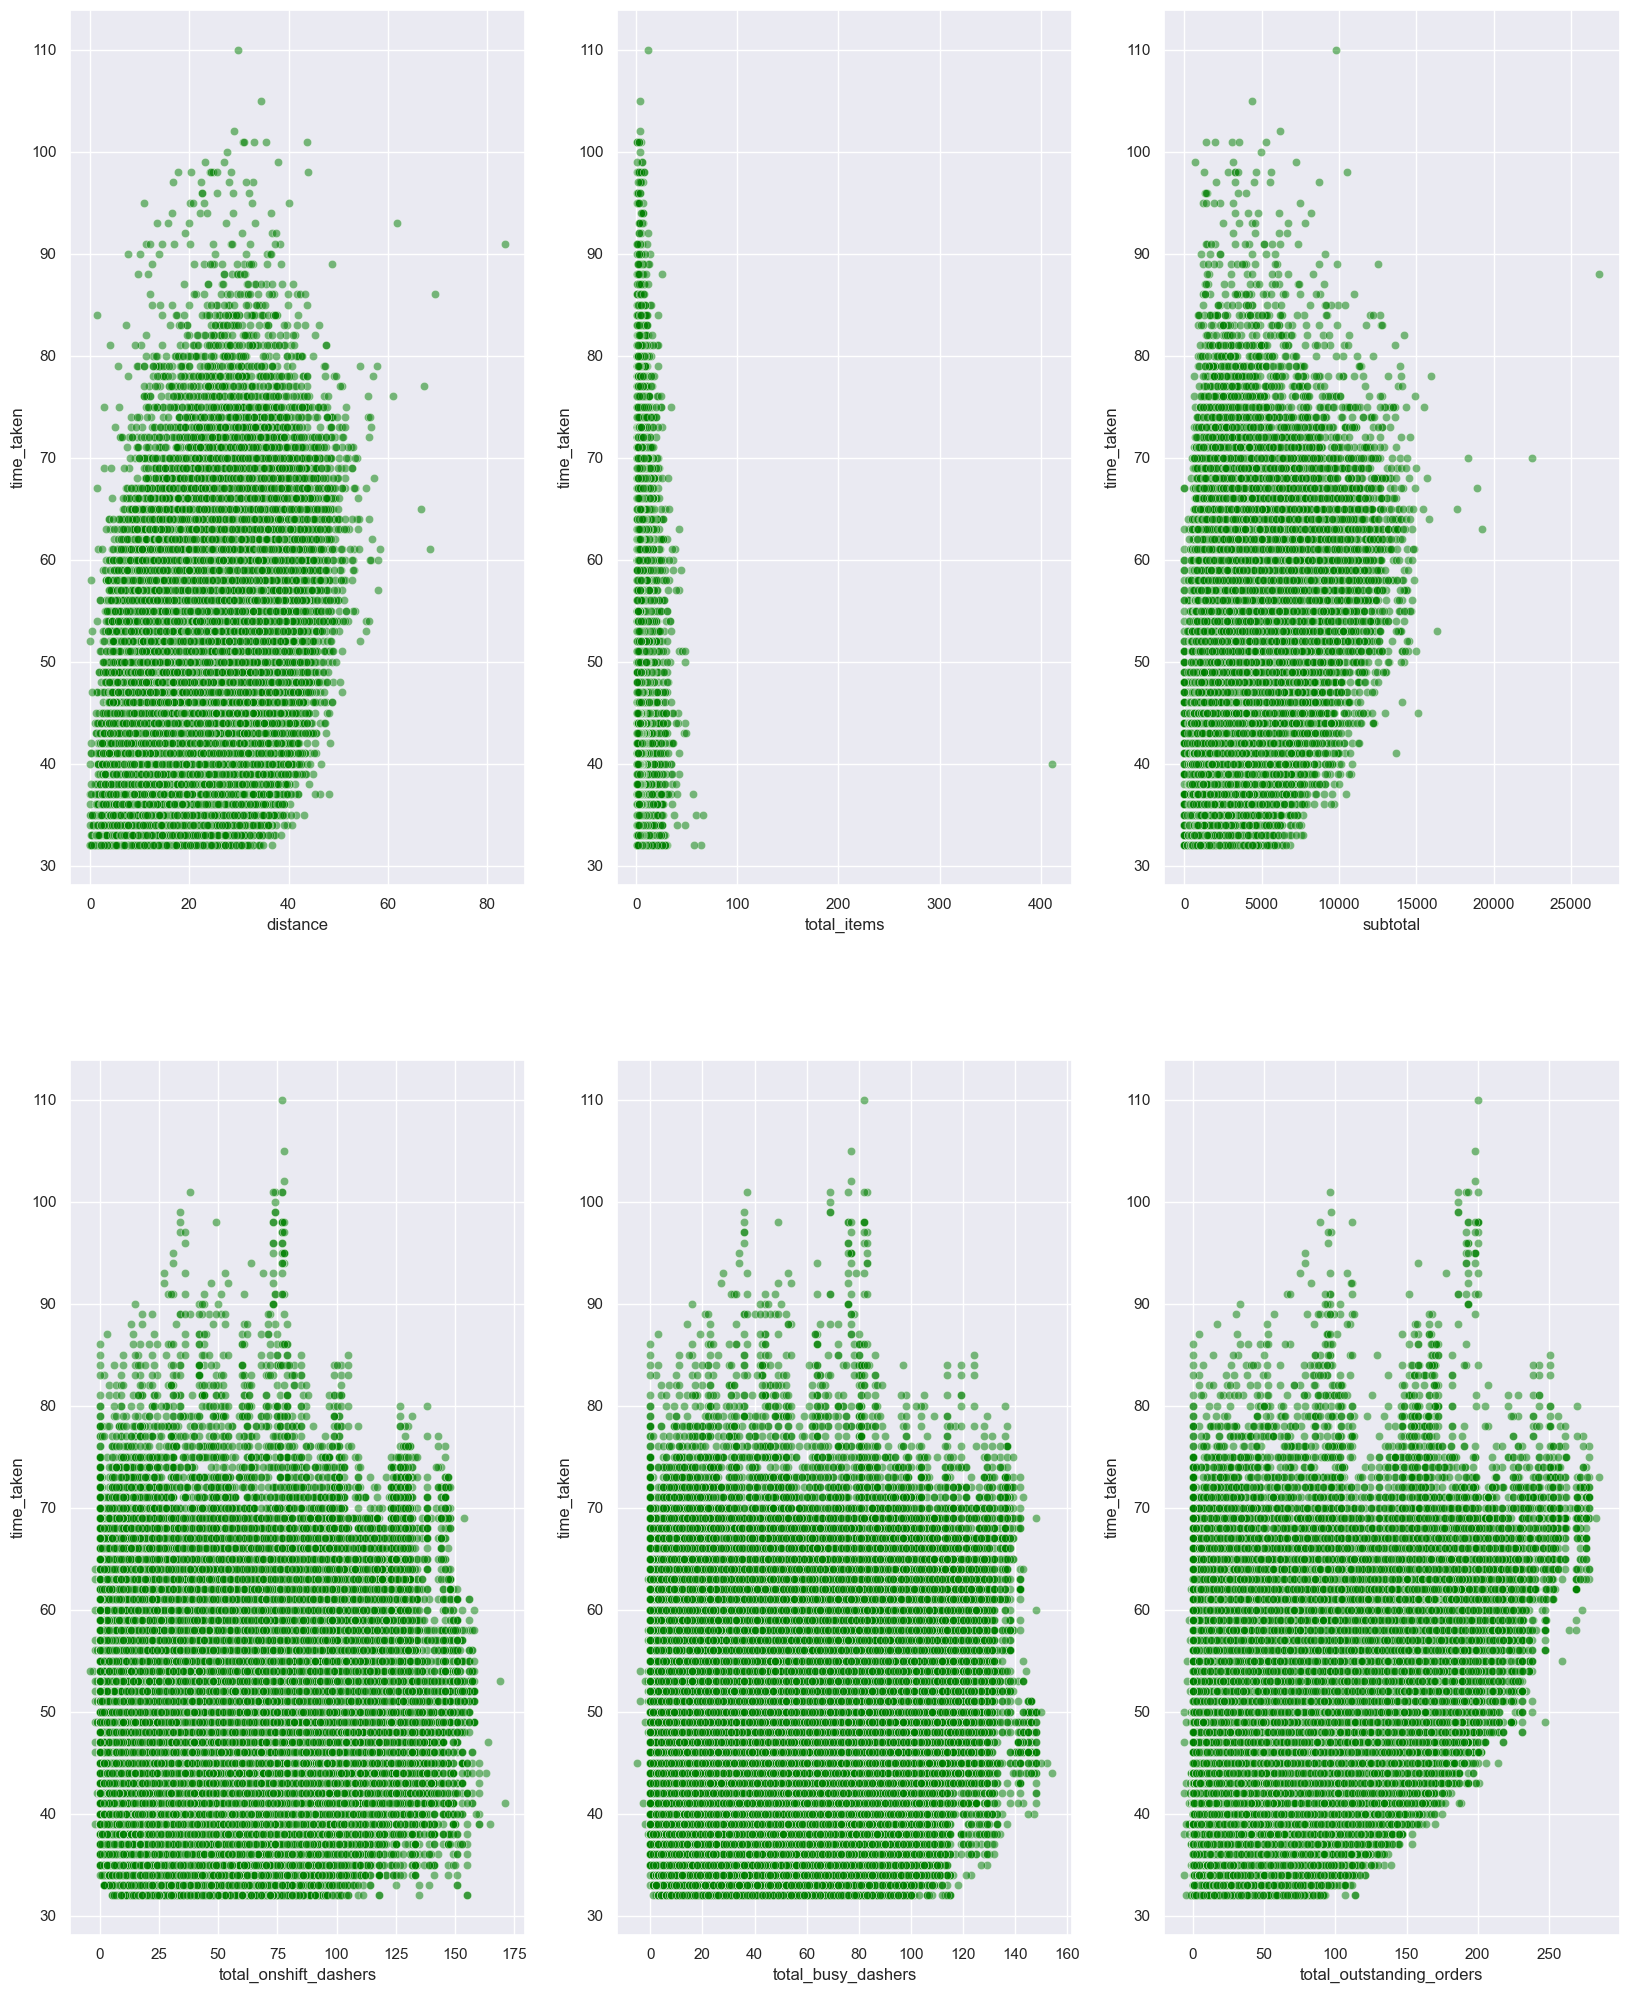

In [98]:
# Scatter plot to visualise the relationship between time_taken and other features
i=1
row=2
col=3
plt.figure(figsize=(20,25))
for cols in important_numerical_features: 
    plt.subplot(row, col, i) 
    sns.scatterplot(x=X_train[cols], y=df_train['time_taken'], alpha=0.5,color='green') 
    sns.set_style("darkgrid")
    sns.set_theme()
    i=i+1
    plt.xlabel(cols) 
    plt.plot()

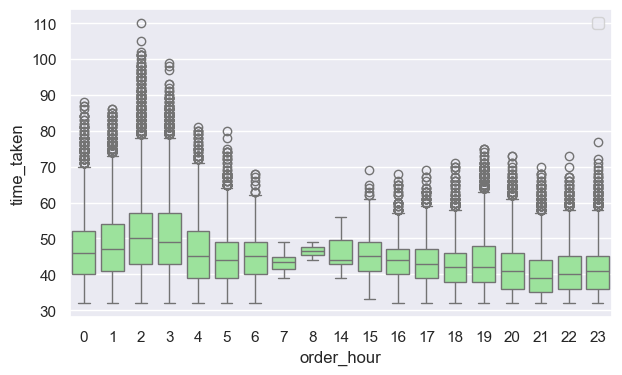

In [101]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(7,4))
sns.boxplot(x=X_train['order_hour'], y=y_train,color='lightgreen')
plt.legend(loc='best')
sns.set_style("darkgrid")
sns.set_theme()

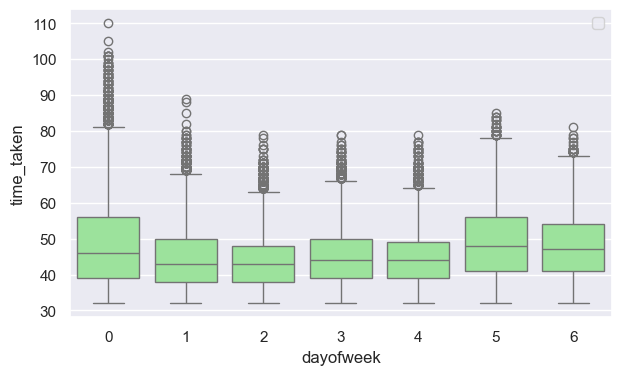

In [102]:
plt.figure(figsize=(7,4))
sns.boxplot(x=X_train['dayofweek'], y=y_train,color='lightgreen')
plt.legend(loc='best')
sns.set_style("darkgrid")
sns.set_theme()

In [103]:
plt.figure(figsize=(7,4))
sns.boxplot(x=X_train['isWeekend'], y=y_train,color='lightgreen')
plt.legend(loc='best')
sns.set_style("darkgrid")
sns.set_theme()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [104]:
train_df_corr = pd.concat([X_train[numerical_cols], y_train], axis=1)

In [105]:
# Plot the heatmap of the correlation matrix

plt.figure(figsize=(12, 10))
sns.heatmap(train_df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features and Target Variable')

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features and Target Variable')

In [106]:
correlation_with_target = train_df_corr.corr()['time_taken'].abs().sort_values()

In [107]:
correlation_with_target

min_item_price              0.021151
dayofweek                   0.044897
total_onshift_dashers       0.171828
total_busy_dashers          0.206514
total_items                 0.220804
max_item_price              0.254650
num_distinct_items          0.312510
order_hour                  0.345716
total_outstanding_orders    0.385028
subtotal                    0.413392
distance                    0.461026
time_taken                  1.000000
Name: time_taken, dtype: float64

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [109]:
# Drop 3-5 weakly correlated columns from training dataset
# For example, 'min_item_price', 'max_item_price', 'num_distinct_items', 'subtotal' 
# often show weaker correlations compared to others for delivery time.


In [110]:
cols_to_drop_after_corr = ['min_item_price', 'max_item_price', 'num_distinct_items']

In [111]:
# drop all the weakly correlated columns
X_train = X_train.drop(columns=cols_to_drop_after_corr)
X_test = X_test.drop(columns=cols_to_drop_after_corr)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [347]:
df_train.columns

Index(['market_id', 'order_protocol', 'total_items', 'subtotal',
       'max_item_price', 'total_busy_dashers', 'distance', 'order_hour',
       'isWeekend', 'time_taken'],
      dtype='object')

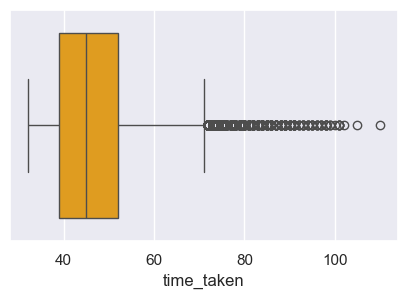

In [112]:
# Boxplot for time_taken
plt.figure(figsize=(5,3))
sns.boxplot(x=y_train,color='orange')
sns.set_style("darkgrid")
sns.set_theme()

In [115]:
current_numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(current_numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=X_train[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [116]:
# Capping outliers at the whiskers (Q1 - 1.5*IQR and Q3 + 1.5*IQR)

def cap_outliers_iqr(df_series):
    Q1 = df_series.quantile(0.25)
    Q3 = df_series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap values
    df_series = df_series.clip(lower=lower_bound, upper=upper_bound)
    return df_series

In [117]:
y_train_capped = cap_outliers_iqr(y_train.copy())

In [118]:
# Apply outlier capping to numerical features in X_train
for col in current_numerical_cols:
    X_train[col] = cap_outliers_iqr(X_train[col])

In [119]:
for col in current_numerical_cols:
    X_test[col] = cap_outliers_iqr(X_test[col])

In [120]:
# recheck
plt.figure(figsize=(15, 10))
for i, col in enumerate(current_numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=X_train[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [121]:
# Define numerical and categorical columns for easy EDA and data manipulation
# Recheck using boxplot
numerical_cols_test = X_test.select_dtypes(include=np.number).columns.tolist()
categorical_cols_test = X_test.select_dtypes(include='category').columns.tolist()

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

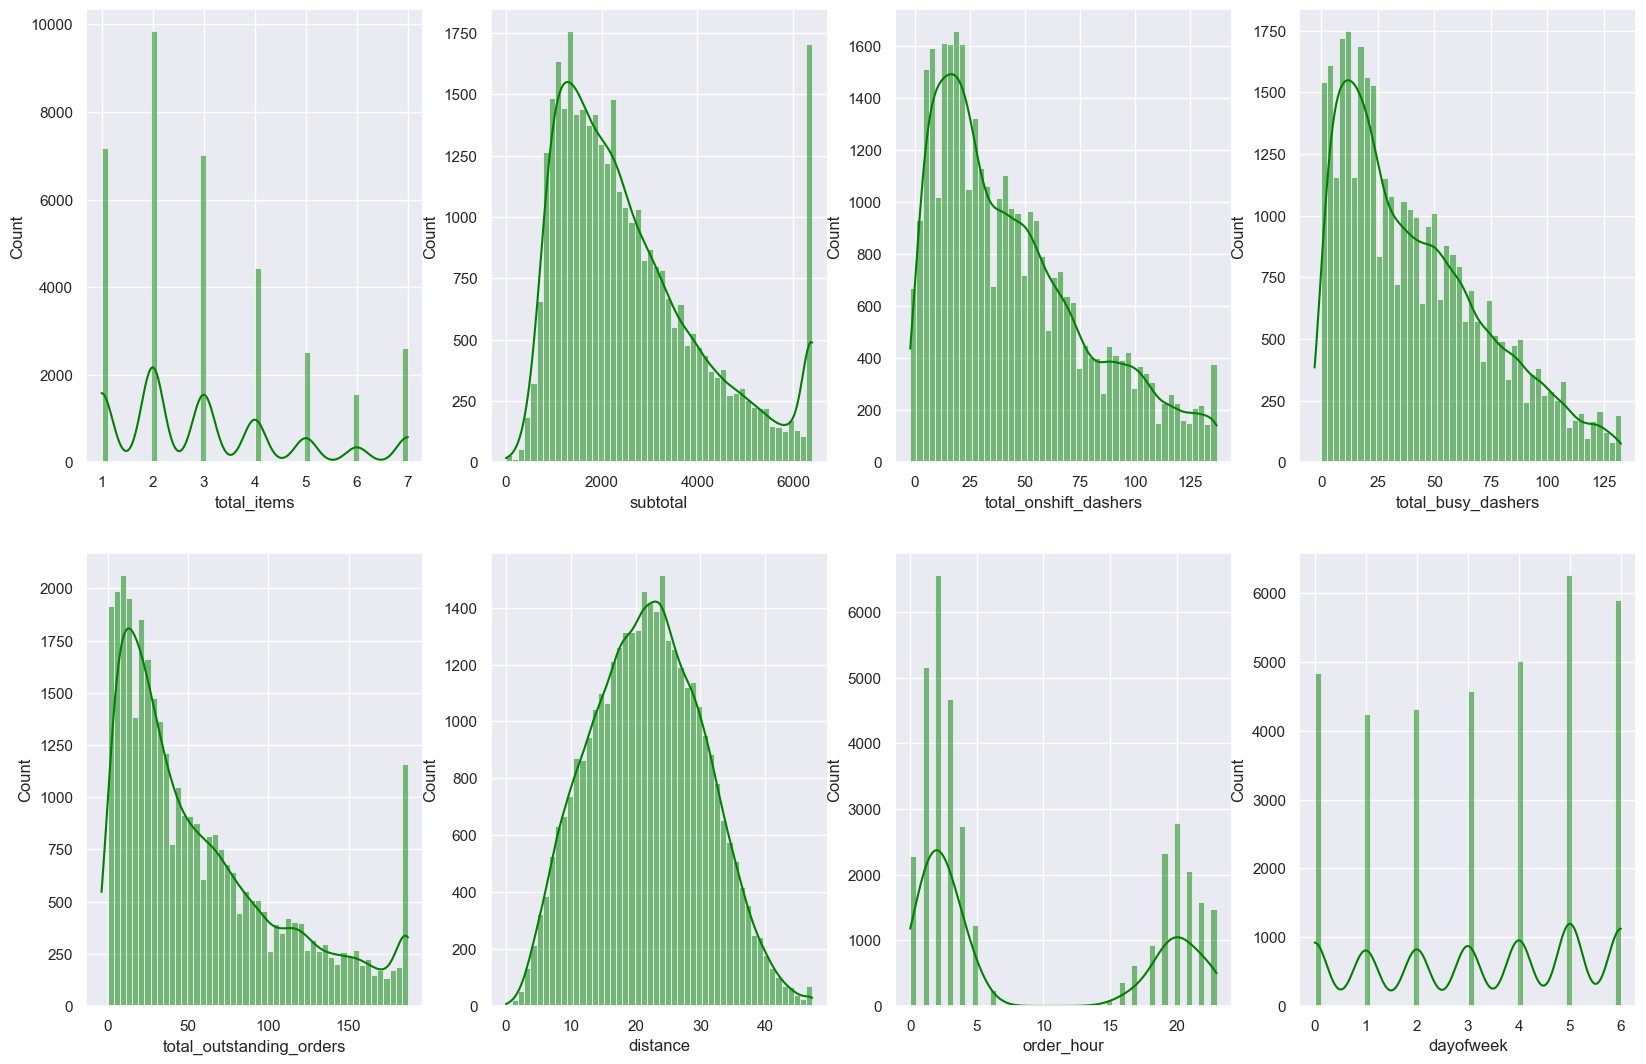

In [122]:
# Plot distributions for all numerical columns
i=1
row=3
col=4
plt.figure(figsize=(20,20))
for cols in numerical_cols_test:
    plt.subplot(3,4,i)
    i=i+1
    sns.histplot(X_test[cols], kde=True,bins=50,color='green')
    sns.set_style("darkgrid")
    sns.set_theme()
    plt.xlabel(cols)
    plt.plot()


##### **4.1.2**
Check the distribution of categorical features

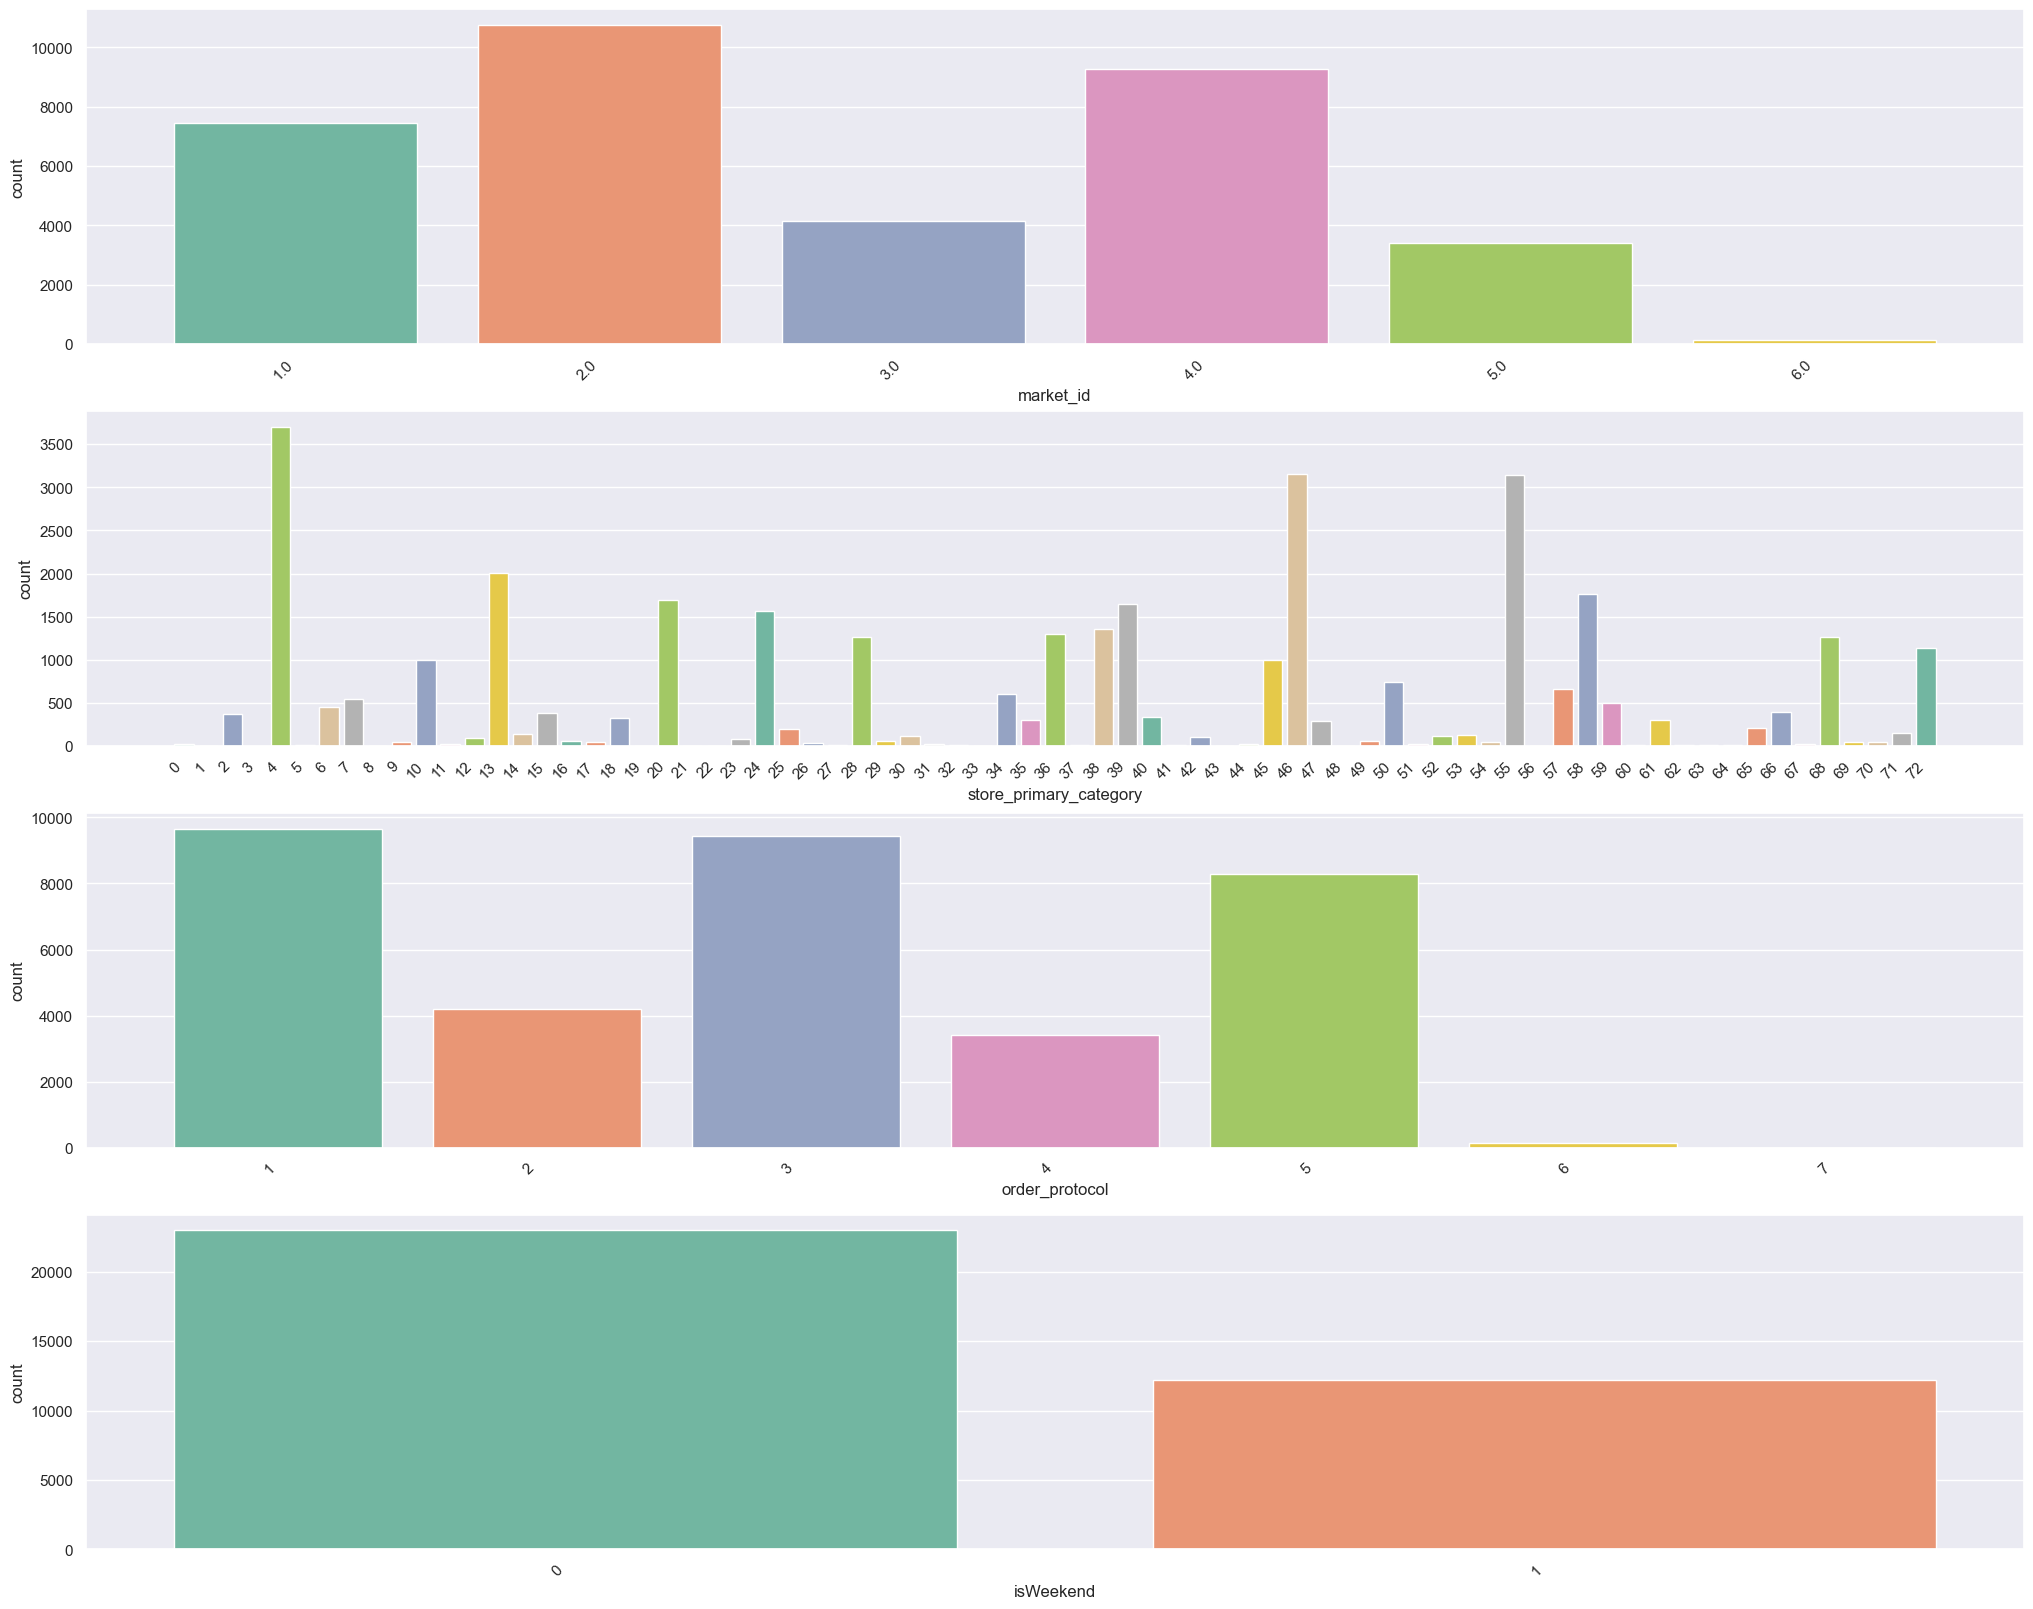

In [123]:
# Distribution of categorical columns

i=1
row=4
col=1
plt.figure(figsize=(25,20))
for cols in categorical_cols_test:
    plt.subplot(row,col,i)
    i=i+1
    sns.countplot(data=X_test,x=cols,palette='Set2')
    sns.set_style("darkgrid")
    sns.set_theme()
    plt.xticks(rotation=45, ha='right') 
    plt.xlabel(cols)
    plt.plot()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [124]:
# Distribution of time_taken
plt.figure(figsize=(7,5))
sns.histplot(y_test,color='green',kde=True,bins=33)
sns.set_style("darkgrid")
sns.set_theme()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [125]:
important_numerical_features_test = [col for col in important_numerical_features if col in X_test.columns]

In [127]:
# Scatter plot to visualise the relationship between time_taken and other features
# ONLY FOR NUMERICAL COLUMNS
i=1
row=3
col=2
plt.figure(figsize=(20,25))
for cols in important_numerical_features_test: 
    plt.subplot(row, col, i) 
    sns.scatterplot(x=X_test[cols], y=y_test, alpha=0.5,color='green') 
    #sns.regplot(data=df_X,x=cols, y=Y_variable,x_bins=500,color='green',marker='^' ) 
    plt.xlabel(cols+'\n') 
    sns.set_style("darkgrid")
    sns.set_theme()
    i=i+1
    plt.plot()

#### **4.3** Drop the columns with weak correlations with the target variable

In [128]:
# Drop the weakly correlated columns from training dataset

In [129]:
# Columns were already dropped in section 3.3.2 based on training data correlation.

In [130]:
X_train.shape

(140621, 12)

In [132]:
X_test.shape

(35156, 12)

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [133]:
# Import libraries

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [134]:
# Apply scaling to the numerical columns

# Creating scaler object
scaler = StandardScaler()

In [135]:
numerical_cols_final = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols_final = X_train.select_dtypes(include='category').columns.tolist()


In [168]:
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols_final, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols_final, drop_first=True)

In [169]:
train_cols = X_train_encoded.columns
test_cols = X_test_encoded.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_encoded[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_encoded[c] = 0

X_test_encoded = X_test_encoded[train_cols]


In [170]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_encoded), columns=X_train_encoded.columns, index=X_train_encoded.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_encoded), columns=X_test_encoded.columns, index=X_test_encoded.index)

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [171]:
# Create/Initialise the model 
# Created the scikit learn model
lr = LinearRegression()

In [172]:
lr=lr.fit(X_train_scaled, y_train_capped)

In [173]:
# Make predictions
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

In [174]:
rmse_train = np.sqrt(mean_squared_error(y_train_capped, y_train_pred))
r2_train = r2_score(y_train_capped, y_train_pred)

In [175]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

In [176]:
r2_train

0.8892193776744322

In [177]:
r2_test

0.8857268024359392

In [178]:
# Train the model using the training data USING STATSMODEL
X_train_sm = sm.add_constant(X_train_scaled)

In [179]:
model_sm = sm.OLS(y_train_capped, X_train_sm)

In [180]:
stats_model_result=model_sm.fit()

In [181]:
stats_model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                 1.240e+04
Date:                Mon, 28 Jul 2025   Prob (F-statistic):               0.00
Time:                        16:48:40   Log-Likelihood:            -3.5572e+05
No. Observations:              140621   AIC:                         7.116e+05
Df Residuals:                  140529   BIC:                         7.125e+05
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        46.1398      0.008   5696.232      0.000      46.124      46.156
total_items                   0.3889      0.012     32.302      0.000       0.365       0.412
subtotal                      2.5306      0.013    202.144      0.000       2.506       2.555
total_onshift_dashers       -11.7364      0.030   -396.032      0.000     -11.794     -11.678
total_busy_dashers           -4.0938      0.028   -146.943      0.000      -4.148      -4.039
total_outstanding_orders     17.7527      0.027    663.336      0.000      17.700      17.805
distance                      4.1998      0.008    513.758      0.000       4.184       4.216
order_hour                   -1.7914      0.009   -190.838      0.000      -1.810      -1.773
dayofweek                    -0.3200      0.014    -22.814      0.000      -0.348      -0.293
market_id_2.0                -2.1942      0.012   -177.253      0.000      -2.219      -2.170
market_id_3.0                -1.3186      0.010   -136.368      0.000      -1.338      -1.300
market_id_4.0                -1.7929      0.012   -148.186      0.000      -1.817      -1.769
market_id_5.0                -1.0050      0.010   -105.045      0.000      -1.024      -0.986
market_id_6.0                -0.1667      0.008    -20.398      0.000      -0.183      -0.151
store_primary_category_1      0.0160      0.008      1.892      0.058      -0.001       0.032
store_primary_category_2      0.0382      0.034      1.126      0.260      -0.028       0.105
store_primary_category_3      0.0143      0.008      1.755      0.079      -0.002       0.030
store_primary_category_4      0.0985      0.102      0.968      0.333      -0.101       0.298
store_primary_category_5      0.0378      0.010      3.620      0.000       0.017       0.058
store_primary_category_6      0.0324      0.038      0.851      0.395      -0.042       0.107
store_primary_category_7      0.1000      0.042      2.408      0.016       0.019       0.181
store_primary_category_8   4.906e-05      0.008      0.006      0.995      -0.016       0.016
store_primary_category_9      0.0484      0.016      3.013      0.003       0.017       0.080
store_primary_category_10     0.0550      0.055      1.001      0.317      -0.053       0.163
store_primary_category_11     0.0224      0.012      1.852      0.064      -0.001       0.046
store_primary_category_12     0.0161      0.018      0.885      0.376      -0.020       0.052
store_primary_category_13     0.0521      0.077      0.673      0.501      -0.099       0.204
store_primary_category_14     0.0458      0.022      2.122      0.034       0.004       0.088
store_primary_category_15     0.0962      0.037      2.608      0.009       0.024       0.168
store_primary_category_16     0.0400      0.016      2.440      0.015      

In [231]:
# Find results for evaluation metrics

rmse_train


3.0364853891510823

In [232]:
rmse_test

3.1625974491763618

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [214]:
# Loop through the number of features and test the model

n_features_to_select = X_train_scaled.shape[1] # Start with all features
rfe_results = []

for n in range(1, 9): 
    estimator = LinearRegression()
    selector = RFE(estimator, n_features_to_select=n, step=1) # step=1 removes one feature at a time
    selector = selector.fit(X_train_scaled, y_train_capped)
    
    selected_features = X_train_scaled.columns[selector.support_]
    
    # Train model with selected features
    lr_rfe = LinearRegression()
    lr_rfe.fit(X_train_scaled[selected_features], y_train_capped)
    
    y_train_pred_rfe = lr_rfe.predict(X_train_scaled[selected_features])
    y_test_pred_rfe = lr_rfe.predict(X_test_scaled[selected_features])
    
    rmse_train_rfe = np.sqrt(mean_squared_error(y_train_capped, y_train_pred_rfe))
    r2_train_rfe = r2_score(y_train_capped, y_train_pred_rfe)
    
    rmse_test_rfe = np.sqrt(mean_squared_error(y_test, y_test_pred_rfe))
    r2_test_rfe = r2_score(y_test, y_test_pred_rfe)
    
    rfe_results.append({
        'n_features': n,
        'selected_features': selected_features.tolist(),
        'train_rmse': rmse_train_rfe,
        'train_r2': r2_train_rfe,
        'test_rmse': rmse_test_rfe,
        'test_r2': r2_test_rfe
    })

results_df = pd.DataFrame(rfe_results)

In [215]:
results_df.sort_values(by='test_r2', ascending=False)

n_features                                  selected_features  train_rmse  \
7           8  [subtotal, total_onshift_dashers, total_busy_d...    3.499889   
6           7  [subtotal, total_onshift_dashers, total_busy_d...    3.622709   
5           6  [subtotal, total_onshift_dashers, total_busy_d...    3.700561   
4           5  [subtotal, total_onshift_dashers, total_busy_d...    4.167285   
3           4  [total_onshift_dashers, total_busy_dashers, to...    5.309477   
2           3  [total_onshift_dashers, total_busy_dashers, to...    6.794220   
1           2  [total_onshift_dashers, total_outstanding_orders]    6.923206   
0           1                         [total_outstanding_orders]    8.452662   

   train_r2  test_rmse   test_r2  
7  0.852826   3.604081  0.851596  
6  0.842316   3.725738  0.841408  
5  0.835466   3.796904  0.835292  
4  0.791345   4.259044  0.792757  
3  0.661292   5.425152  0.663736  
2  0.445373   6.896315  0.456636  
1  0.424115   7.038262  0.434038  
0  0.141563   8.671382  0.140921

In [216]:
# Visualise RFE performance
plt.figure(figsize=(12, 6))
plt.plot(results_df['n_features'], results_df['train_r2'], label='Train R2')
plt.plot(results_df['n_features'], results_df['test_r2'], label='Test R2')
plt.xlabel('Number of Features')
plt.ylabel('R-squared')
plt.title('R-squared vs Number of Features (RFE)')
plt.legend()
plt.grid(True)
plt.show()

In [217]:
plt.figure(figsize=(12, 6))
plt.plot(results_df['n_features'], results_df['train_rmse'], label='Train RMSE')
plt.plot(results_df['n_features'], results_df['test_rmse'], label='Test RMSE')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Features (RFE)')
plt.legend()
plt.grid(True)
plt.show()


In [218]:
# Build the final model with selected number of features
# Choose the number of features based on the plot where test R2 plateaus or is highest.
# For demonstration, let's pick a high R2 point, e.g., if max R2 occurs at 8 features, select that.
optimal_n_features = results_df.loc[results_df['test_r2'].idxmax()]['n_features']
final_selected_features = results_df.loc[results_df['test_r2'].idxmax()]['selected_features']

print(f"\nOptimal number of features selected by RFE: {optimal_n_features}")
print("Final selected features:", final_selected_features)

# Re-run RFE with the optimal number of features to get the final selector
final_selector = RFE(LinearRegression(), n_features_to_select=optimal_n_features, step=1)
final_selector = final_selector.fit(X_train_scaled, y_train_capped)
final_features = X_train_scaled.columns[final_selector.support_]

# Build the final Linear Regression model
final_lr_model = LinearRegression()
final_lr_model.fit(X_train_scaled[final_features], y_train_capped)

final_y_train_pred = final_lr_model.predict(X_train_scaled[final_features])
final_y_test_pred = final_lr_model.predict(X_test_scaled[final_features])

final_rmse_train = np.sqrt(mean_squared_error(y_train_capped, final_y_train_pred))
final_r2_train = r2_score(y_train_capped, final_y_train_pred)

final_rmse_test = np.sqrt(mean_squared_error(y_test, final_y_test_pred))
final_r2_test = r2_score(y_test, final_y_test_pred)



Optimal number of features selected by RFE: 8
Final selected features: ['subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'market_id_2.0', 'market_id_4.0']


In [219]:
X_train_final_sm = sm.add_constant(X_train_scaled[final_features])
final_model_sm = sm.OLS(y_train_capped, X_train_final_sm)
final_model_sm_result=final_model_sm.fit()
print("\n--- Statsmodels OLS Summary (Final RFE Model) ---")
final_model_sm_result.summary()


--- Statsmodels OLS Summary (Final RFE Model) ---


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 1.019e+05
Date:                Mon, 28 Jul 2025   Prob (F-statistic):               0.00
Time:                        17:55:18   Log-Likelihood:            -3.7569e+05
No. Observations:              140621   AIC:                         7.514e+05
Df Residuals:                  140612   BIC:                         7.515e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       46.1398      0.009   4943.480      0.000      46.122      46.158
subtotal                     2.9626      0.010    308.343      0.000       2.944       2.981
total_onshift_dashers      -12.3203      0.033   -370.634      0.000     -12.385     -12.255
total_busy_dashers          -3.7918      0.032   -119.456      0.000      -3.854      -3.730
total_outstanding_orders    18.0995      0.031    592.605      0.000      18.040      18.159
distance                     4.1751      0.009    445.816      0.000       4.157       4.193
order_hour                  -1.7693      0.011   -167.454      0.000      -1.790      -1.749
market_id_2.0               -1.5092      0.012   -123.367      0.000      -1.533      -1.485
market_id_4.0               -1.1928      0.012   -100.210      0.000      -1.216      -1.169
==============================================================================
Omnibus:                    32662.284   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           103321.609
Skew:                           1.187   Prob(JB):                         0.00
Kurtosis:                       6.464   Cond. No.                         7.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

Text(0, 0.5, 'Residuals')

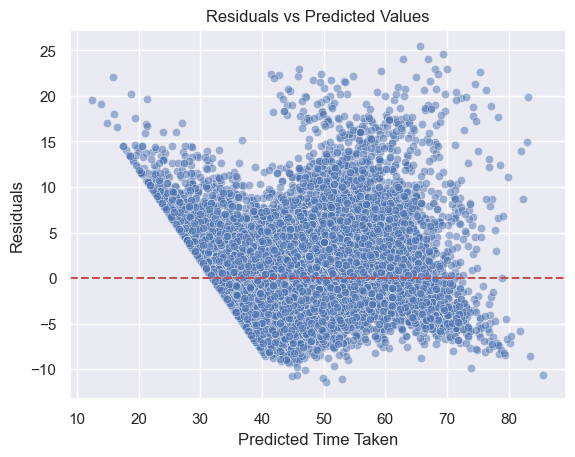

In [220]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
residuals = y_test - final_y_test_pred
# Residuals vs Predicted Values Plot
sns.scatterplot(x=final_y_test_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Time Taken')
plt.ylabel('Residuals')

Text(0.5, 1.0, 'Q-Q Plot of Residuals')

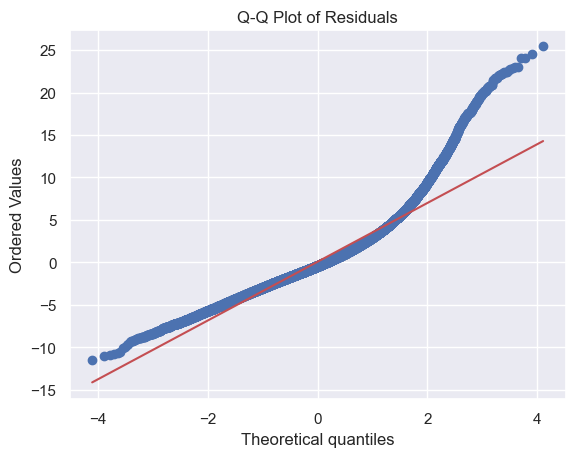

In [221]:
# Q-Q Plot
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')


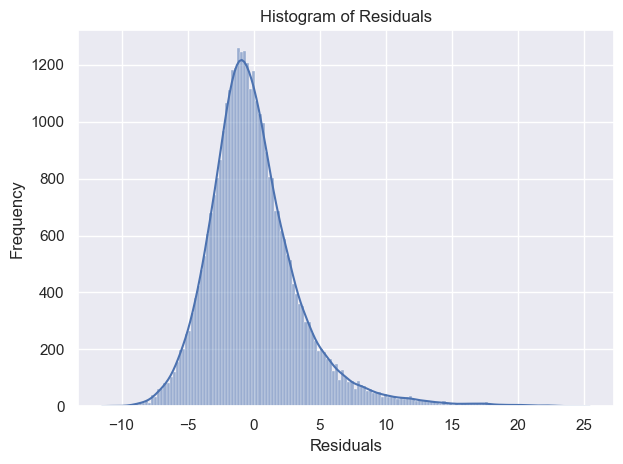

In [222]:
# Residual Histogram
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [223]:
# Compare the scaled vs unscaled features used in the final model

scaled_coefficients = pd.DataFrame({'Feature': final_features, 'Scaled_Coefficient': final_lr_model.coef_})
scaled_coefficients = scaled_coefficients.sort_values(by='Scaled_Coefficient', ascending=False).reset_index(drop=True)

In [224]:
unscaled_lr_model = LinearRegression()
unscaled_lr_model.fit(X_train_encoded[final_features], y_train_capped)

unscaled_coefficients = pd.DataFrame({'Feature': final_features, 'Unscaled_Coefficient': unscaled_lr_model.coef_})
unscaled_coefficients = unscaled_coefficients.sort_values(by='Unscaled_Coefficient', ascending=False).reset_index(drop=True)
print("\n--- Unscaled Coefficients ---")
unscaled_coefficients



--- Unscaled Coefficients ---


Feature  Unscaled_Coefficient
0                  distance              0.478179
1  total_outstanding_orders              0.356203
2                  subtotal              0.001932
3        total_busy_dashers             -0.117924
4                order_hour             -0.203902
5     total_onshift_dashers             -0.357915
6             market_id_4.0             -2.709824
7             market_id_2.0             -3.281555

In [225]:
scaled_coefficients = pd.DataFrame({'Feature': final_features, 'scaled_Coefficient': final_lr_model.coef_})


In [226]:
unscaled_and_scaled_coefficients=pd.merge(unscaled_coefficients, scaled_coefficients, on='Feature', how='inner')

In [227]:
unscaled_and_scaled_coefficients

Feature  Unscaled_Coefficient  scaled_Coefficient
0                  distance              0.478179            4.175059
1  total_outstanding_orders              0.356203           18.099525
2                  subtotal              0.001932            2.962573
3        total_busy_dashers             -0.117924           -3.791769
4                order_hour             -0.203902           -1.769310
5     total_onshift_dashers             -0.357915          -12.320315
6             market_id_4.0             -2.709824           -1.192802
7             market_id_2.0             -3.281555           -1.509192

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [228]:
# Analyze the effect of a unit change in a feature, say 'total_items'

if 'total_items' in final_features:
    total_items_unscaled_coef = unscaled_coefficients[unscaled_coefficients['Feature'] == 'total_items']['Unscaled_Coefficient'].values[0]
    print(f"\nEffect of a unit change in 'total_items' on delivery time: For every one-unit increase in 'total_items', the delivery time is expected to change by approximately {total_items_unscaled_coef:.2f} minutes, holding other factors constant.")
else:
    print("\n'total_items' was not selected as a final feature, so its direct unscaled coefficient effect cannot be analyzed in the final model.")



'total_items' was not selected as a final feature, so its direct unscaled coefficient effect cannot be analyzed in the final model.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

Yes, there are categorical variables in the data, including `market_id`, `store_primary_category`, and `order_protocol`. After feature engineering, `order_hour`, `day_of_week`, and `isWeekend` also become categorical features.
* **Inferences on their effect on delivery time:**
    * **`market_id`**: Different markets may have varying delivery efficiencies due to factors like traffic, infrastructure, and dasher availability, leading to different average delivery times.
    * **`store_primary_category`**: The type of restaurant can influence preparation time and order complexity, affecting delivery time (e.g., fast-food vs. fine-dining).
    * **`order_protocol`**: How an order is placed might influence processing time and, consequently, delivery time.
    * **`order_hour`**: Delivery times can vary significantly by hour due to peak hours (lunch/dinner rush) causing more traffic, higher order volumes, and fewer available dashers, leading to longer delivery times.
    * **`day_of_week` / `isWeekend`**: Delivery times might differ on weekdays vs. weekends due to changes in order volume, traffic patterns, and dasher availability.

---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>

The `test_size = 0.2` refers to the proportion of the dataset that will be allocated to the test set when splitting the data. In this case, 20% of the total data will be used as the test set, and the remaining 80% will be used as the training set.This split helps evaluate the model's performance on unseen data.


---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>

Generally, `total_outstanding_orders`, `total_busy_dashers`, `total_onshift_dashers` and `distance` tend to have higher positive correlations with target_variable.

---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>

Box plots were used to visually represent data distribution and identify points falling outside the whiskers.\

    ** Outliers were addressed using the IQR (Interquartile Range) method of capping.
 
         * The 25th (Q1) and 75th (Q3) percentiles were calculated, and IQR was determined as Q3 - Q1.
         * A lower bound (`Q1 - 1.5 * IQR`) and an upper bound (`Q3 + 1.5 * IQR`) were established.
         * Any data points below the lower bound were capped to the lower bound value, are outliners and should be eliminated

---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>

One needs to refer to the "Coefficient Analysis" of the final RFE model.
* Commonly impactful features include:
    * **`distance`**: 
    * **`total_outstanding_orders`**: 
    * **`subtotal`**: 
* The specific top 3 features are determined by the final model's coefficients.

---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>


* **Definition**: Linear Regression is a supervised machine learning algorithm used to predict a continuous target variable based on one or more independent variables.
* **Goal**: To find the best-fitting straight line (or hyperplane) that minimizes the sum of squared differences between predicted and actual values.
* **Model Equation**:
    * Simple: Y = β₀ + β₁X + ε
    * Multiple:  Y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ + ε
  

    * Where `Y` is the target, `X` are features, `β` are coefficients (slope and intercept), and `ε` is the error term.
* **Cost Function**: Typically Mean Squared Error (MSE), which quantifies the error between actual (`yᵢ`) and predicted (`ŷᵢ`) values: `MSE = (1/N) * Σ(yᵢ - ŷᵢ)²`.
* **Minimization Techniques**:
    * **Ordinary Least Squares (OLS)**: Calculates coefficients directly using a closed-form solution.
    * **Gradient Descent**: Iteratively adjusts coefficients in the direction that reduces the cost function most steeply, controlled by a learning rate.
* **Assumptions**: Linearity, independence of residuals, homoscedasticity, normality of residuals, and no multicollinearity.
* **Evaluation Metrics**: R-squared, Mean Squared Error (MSE), Root Mean Squared Error (RMSE).

---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>

* **Simple Linear Regression**:
    * Uses only one independent (predictor) variable.
    * Equation: Y = β₀ + β₁X + ε.
    * Can be visualized as a straight line on a 2D scatter plot.
* **Multiple Linear Regression**:
    * Uses two or more independent (predictor) variables.
    * Equation: Y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ + ε.
    * Represents a hyperplane in a multi-dimensional space, not easily visualized as a simple line.
    * More common in real-world scenarios as outcomes are influenced by multiple factors.


---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>


* **Role**: The cost function quantifies the error between predicted and actual values, providing a single measure of model performance. The goal is to find coefficients that minimize this error.
* **Minimization**:
    * **Ordinary Least Squares (OLS)**: An analytical method that directly calculates optimal coefficients by setting partial derivatives of the cost function to zero.
    * **Gradient Descent**: An iterative optimization algorithm that starts with arbitrary coefficients, calculates the gradient of the cost function, and repeatedly adjusts coefficients in the opposite direction of the gradient (guided by a learning rate) until convergence.


---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>

* **Overfitting**:
    * **Definition**: Model learns training data too well, including noise, failing to generalize to unseen data.
    * **Characteristics**: High training performance, poor test performance, high variance.
    * **Causes**: Overly complex model, insufficient training data.
    * **Remedies**: Simplify model, increase data, use regularization, early stopping, cross-validation.
* **Underfitting**:
    * **Definition**: Model is too simple to capture underlying patterns in data, failing to learn adequately from training data.
    * **Characteristics**: Poor performance on both training and test data, high bias.
    * **Causes**: Overly simple model, insufficient features.
    * **Remedies**: Increase model complexity, improve feature engineering, reduce regularization.

---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>

* Residual plots analyze the differences between observed and predicted values.
* **Checking for Linearity**: A random scatter of points around zero indicates appropriate linearity. Patterns (e.g., curves) suggest non-linearity.
* **Checking for Homoscedasticity (Constant Variance)**: Consistent spread of residuals indicates homoscedasticity. A widening or narrowing spread (cone shape) suggests heteroscedasticity, violating assumptions.
* **Checking for Independence of Residuals**: For ordered data, no patterns in residuals suggest independence. Patterns (e.g., autocorrelation) indicate non-independence.
* **Checking for Normality of Residuals**: Q-Q plots (points along a 45-degree line) and histograms (bell-shaped) help check for normality. Deviations suggest non-normal residuals.
* Residual plots help identify assumption violations and guide decisions on data transformations, feature engineering, or alternative models.